## Demo of OT Domain Adaptation for color transfer in images

The color adaptation problem and the out of sample interpolation has been proposed in [6]:

[6] Ferradans, S., Papadakis, N., Peyré, G., & Aujol, J. F. (2014). Regularized discrete optimal transport. SIAM Journal on Imaging Sciences, 7(3), 1853-1882.


In [1]:
import numpy as np
import scipy.ndimage as spi
import matplotlib.pylab as pl
import ot


### Loading images

In [2]:
I1=spi.imread('../data/ocean_day.jpg').astype(np.float64)/256
I2=spi.imread('../data/ocean_sunset.jpg').astype(np.float64)/256


### Plotting images

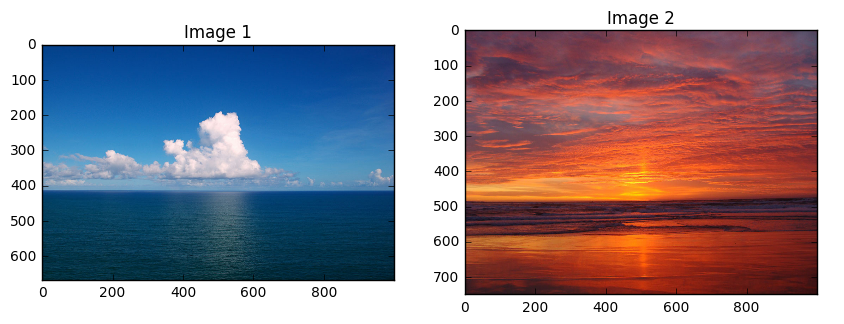

In [3]:
pl.figure(1,(10,5))

pl.subplot(1,2,1)
pl.imshow(I1)
pl.title('Image 1')

pl.subplot(1,2,2)
pl.imshow(I2)
pl.title('Image 2')

pl.show()

### Convert image to matrix and dataset generation

In [4]:
def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0]*I.shape[1],I.shape[2]))

def mat2im(X,shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)

X1=im2mat(I1)
X2=im2mat(I2)

# training samples
nb=1000
idx1=np.random.randint(X1.shape[0],size=(nb,))
idx2=np.random.randint(X2.shape[0],size=(nb,))

xs=X1[idx1,:]
xt=X2[idx2,:]


### Plot the images distributions

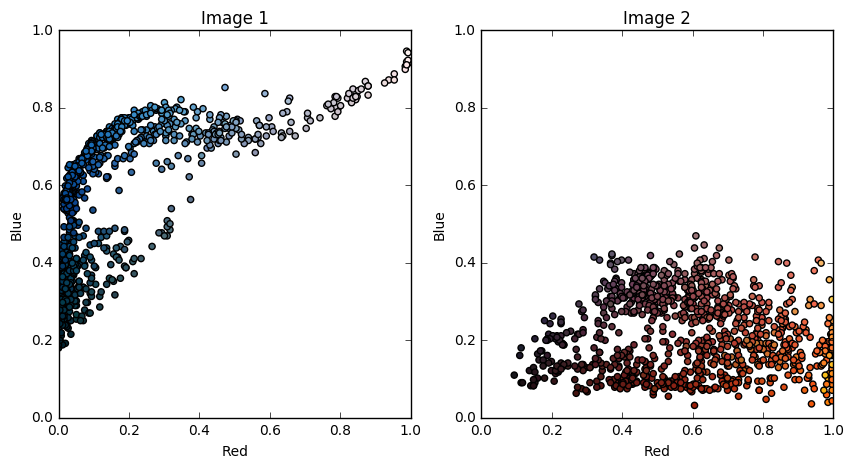

In [5]:
pl.figure(2,(10,5))

pl.subplot(1,2,1)
pl.scatter(xs[:,0],xs[:,2],c=xs)
pl.axis([0,1,0,1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 1')

pl.subplot(1,2,2)
#pl.imshow(I2)
pl.scatter(xt[:,0],xt[:,2],c=xt)
pl.axis([0,1,0,1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')

pl.show()

### Domain adaptation between images color spaces

In [6]:
# LP problem
da_emd=ot.da.OTDA()     # init class
da_emd.fit(xs,xt)       # fit distributions


# sinkhorn regularization
lambd=1e-1
da_entrop=ot.da.OTDA_sinkhorn()
da_entrop.fit(xs,xt,reg=lambd)

### Image adaptation with out of sample extension as in [6]

In [7]:
X1t=da_emd.predict(X1)
X2t=da_emd.predict(X2,-1)


X1te=da_entrop.predict(X1)
X2te=da_entrop.predict(X2,-1)


def minmax(I):
    return np.minimum(np.maximum(I,0),1)

I1t=minmax(mat2im(X1t,I1.shape))
I2t=minmax(mat2im(X2t,I2.shape))

I1te=minmax(mat2im(X1te,I1.shape))
I2te=minmax(mat2im(X2te,I2.shape))

### Plot all adapted images

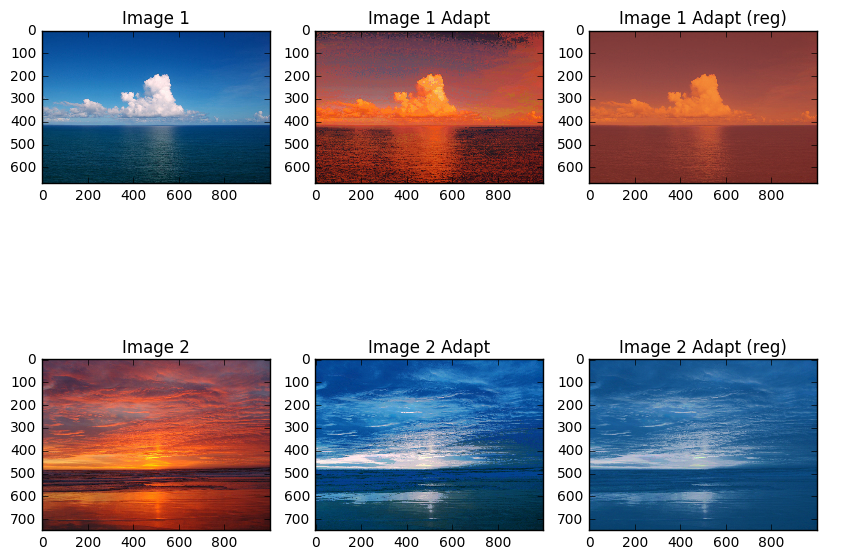

In [8]:
pl.figure(2,(10,8))

pl.subplot(2,3,1)

pl.imshow(I1)
pl.title('Image 1')

pl.subplot(2,3,2)
pl.imshow(I1t)
pl.title('Image 1 Adapt')


pl.subplot(2,3,3)
pl.imshow(I1te)
pl.title('Image 1 Adapt (reg)')

pl.subplot(2,3,4)

pl.imshow(I2)
pl.title('Image 2')

pl.subplot(2,3,5)
pl.imshow(I2t)
pl.title('Image 2 Adapt')


pl.subplot(2,3,6)
pl.imshow(I2te)
pl.title('Image 2 Adapt (reg)')

pl.show()